### load libraries

In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### load Data

In [ ]:
df = pd.read_csv(r'/content/IMDb Movies India.csv',encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_to_group_by = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in columns_to_group_by:
    df[f'{col}_Average_Rating'] = df.groupby(col)['Rating'].transform('mean')

df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor 1_Average_Rating,Actor 2_Average_Rating,Actor 3_Average_Rating
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,6.352082,5.700000,NaN,5.229412,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.352082,7.000000,6.850000,7.000000,7.000000
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.493103,NaN,7.000000,7.350000,NaN
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.722500,4.400000,5.420000,4.400000,4.450000
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.352082,6.333333,7.000000,5.742857,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.092566,4.075000,6.025532,3.700000,4.600000
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.468266,5.225000,5.481707,4.645455,5.617143
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,5.092566,NaN,NaN,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,5.092566,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor 1_Average_Rating,Actor 2_Average_Rating,Actor 3_Average_Rating
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,6.352082,5.700000,NaN,5.229412,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.352082,7.000000,6.85,7.000000,7.00
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.493103,NaN,7.00,7.350000,NaN
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.722500,4.400000,5.42,4.400000,4.45
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.352082,6.333333,7.00,5.742857,5.40


In [ ]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor 1_Average_Rating,Actor 2_Average_Rating,Actor 3_Average_Rating
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.092566,4.075,6.025532,3.700000,4.600000
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.468266,5.225,5.481707,4.645455,5.617143
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,5.092566,NaN,NaN,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,5.092566,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.468266,4.350,5.742537,5.497500,4.633333


In [ ]:
df.sample(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor 1_Average_Rating,Actor 2_Average_Rating,Actor 3_Average_Rating
4948,Gauri,(1943),NaN,NaN,8.5,8,Kidar Nath Sharma,Monica Desai,Prithviraj Kapoor,Raj Kapoor,NaN,7.466667,8.100000,6.800000,7.675
7500,Khamoshiyan,(2015),122 min,"Drama, Horror, Romance",4.0,"1,220",Karan Darra,Gurmeet Choudhary,Ali Fazal,Sapna Pabbi,4.533333,4.000000,3.966667,4.966667,4.000


In [ ]:
df.shape

(15509, 15)

In [ ]:
df.describe()

,Rating,Genre_Average_Rating,Director_Average_Rating,Actor 1_Average_Rating,Actor 2_Average_Rating,Actor 3_Average_Rating
count,7919.000000,13561.000000,11015.000000,10812.000000,10443.000000,10132.000000
mean,5.841621,5.828543,5.843739,5.834450,5.819594,5.824892
std,1.381777,0.632281,1.092917,1.021656,1.040761,1.024271
min,1.100000,2.400000,1.700000,1.400000,1.600000,1.700000
25%,4.900000,5.326966,5.200000,5.250000,5.200000,5.225000
50%,6.000000,5.739906,5.945455,5.900000,5.911111,5.925000
75%,6.800000,6.352082,6.600000,6.500000,6.476923,6.483333
max,10.000000,9.400000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     15509 non-null  object 
 1   Year                     14981 non-null  object 
 2   Duration                 7240 non-null   object 
 3   Genre                    13632 non-null  object 
 4   Rating                   7919 non-null   float64
 5   Votes                    7920 non-null   object 
 6   Director                 14984 non-null  object 
 7   Actor 1                  13892 non-null  object 
 8   Actor 2                  13125 non-null  object 
 9   Actor 3                  12365 non-null  object 
 10  Genre_Average_Rating     13561 non-null  float64
 11  Director_Average_Rating  11015 non-null  float64
 12  Actor 1_Average_Rating   10812 non-null  float64
 13  Actor 2_Average_Rating   10443 non-null  float64
 14  Actor 3_Average_Rating

In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
d = df.isnull().sum()
d[d > 0]

,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144
Genre_Average_Rating,1948


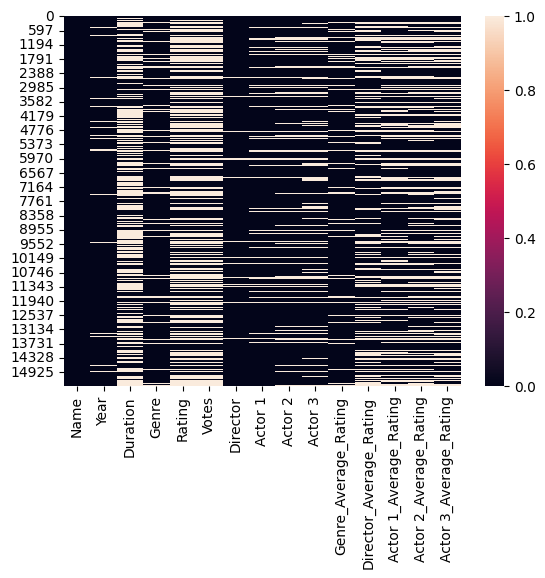

In [ ]:
sns.heatmap(df.isnull())
plt.show()

### Data cleaning

In [ ]:
def clean(d):
  d.drop(["Name"],axis = 1,inplace=True)
  d.dropna(inplace = True)
clean(df)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor 1_Average_Rating,Actor 2_Average_Rating,Actor 3_Average_Rating
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15494,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0
Genre_Average_Rating,0


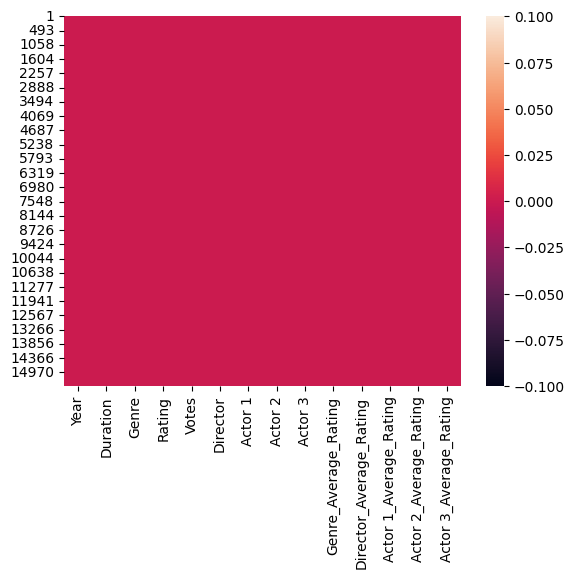

In [ ]:
sns.heatmap(df.isnull())
plt.show()

### data analysis

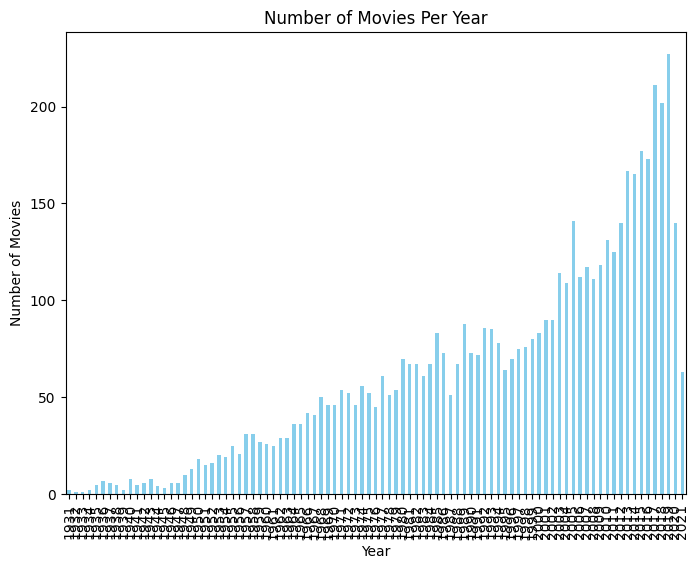

In [ ]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)
year_counts = df['Year'].value_counts()

plt.figure(figsize=(8, 6))
year_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

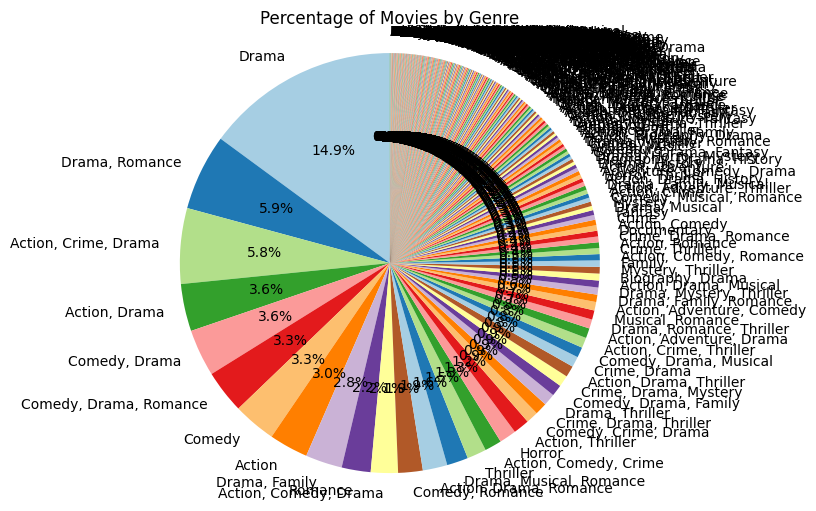

In [ ]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Movies by Genre')
plt.axis('equal')
plt.show()

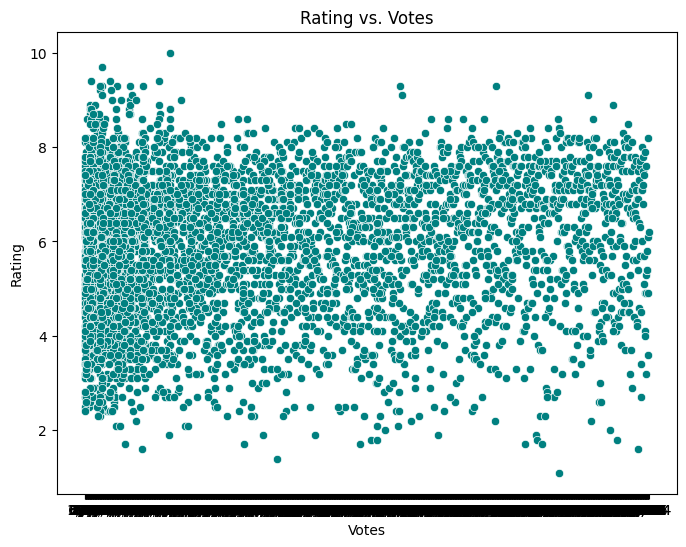

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Votes', y='Rating', color='teal')
plt.title('Rating vs. Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

### Data transformation

In [ ]:
label = LabelEncoder()
df['Year'] = label.fit_transform(df['Year'])
df['Duration'] = label.fit_transform(df['Duration'])
df['Genre'] = label.fit_transform(df['Genre'])
df['Votes'] = label.fit_transform(df['Votes'])
df['Director'] = label.fit_transform(df['Director'])
df['Actor 1'] = label.fit_transform(df['Actor 1'])
df['Actor 2'] = label.fit_transform(df['Actor 2'])
df['Actor 3'] = label.fit_transform(df['Actor 3'])
df['Rating'] = label.fit_transform(df['Rating'])
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor 1_Average_Rating,Actor 2_Average_Rating,Actor 3_Average_Rating
1,88,9,229,56,1843,629,1352,2272,319,6.352082,7.000000,6.850000,7.000000,7.000000
3,88,10,184,30,1164,1335,1198,719,2148,5.722500,4.400000,5.420000,4.400000,4.450000
5,66,47,157,33,1892,1530,378,75,2045,6.224490,5.358824,4.788889,5.786667,5.846154
6,74,42,289,60,34,2044,692,1112,2524,6.820000,7.500000,5.356000,6.050000,6.500000
8,81,156,320,42,1133,135,1934,1175,1013,5.463636,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,84,15,229,47,1312,1223,1861,1801,1615,6.352082,6.100000,6.725000,6.100000,5.850000
15494,70,53,133,48,178,2059,763,1619,1184,6.852941,7.250000,4.157143,5.689873,5.954545
15503,58,25,28,44,1348,1793,406,754,1685,5.616067,5.885714,6.328571,5.800000,5.850000
15505,68,29,38,31,1681,1025,112,2164,314,5.468266,5.225000,5.481707,4.645455,5.617143


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5659 non-null   int64  
 1   Duration                 5659 non-null   int64  
 2   Genre                    5659 non-null   int64  
 3   Rating                   5659 non-null   int64  
 4   Votes                    5659 non-null   int64  
 5   Director                 5659 non-null   int64  
 6   Actor 1                  5659 non-null   int64  
 7   Actor 2                  5659 non-null   int64  
 8   Actor 3                  5659 non-null   int64  
 9   Genre_Average_Rating     5659 non-null   float64
 10  Director_Average_Rating  5659 non-null   float64
 11  Actor 1_Average_Rating   5659 non-null   float64
 12  Actor 2_Average_Rating   5659 non-null   float64
 13  Actor 3_Average_Rating   5659 non-null   float64
dtypes: float64(5), int64(9)
memo

### **Create model**

In [ ]:
X = df.drop(['Rating'],axis = 1)
y = df.Rating

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,shuffle=True,
                                                  random_state=44)

In [ ]:
model1 = XGBRegressor()
model1.fit(X_train,y_train)
pred = model1.predict(X_test)
print(mean_squared_error(pred,y_test))
print(mean_absolute_error(pred,y_test))
print(r2_score(pred,y_test))

45.09862518310547
4.841493606567383
0.7080753445625305


In [ ]:
model2 = LGBMRegressor()
model2.fit(X_train,y_train)
pred = model2.predict(X_test)
print(mean_squared_error(pred,y_test))
print(mean_absolute_error(pred,y_test))
print(r2_score(pred,y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2892
[LightGBM] [Info] Number of data points in the train set: 4244, number of used features: 13
[LightGBM] [Info] Start training from score 45.145146
40.744889559563084
4.581014579793164
0.7329648464662428


In [ ]:
# This is the best algorithm in this project.

model3 = CatBoostRegressor()
model3.fit(X_train,y_train)
pred = model3.predict(X_test)
print(mean_squared_error(pred,y_test))
print(mean_absolute_error(pred,y_test))
print(r2_score(pred,y_test))

Learning rate set to 0.051448
0:	learn: 13.4573462	total: 12.1ms	remaining: 12.1s
1:	learn: 13.0384640	total: 22ms	remaining: 11s
2:	learn: 12.6486095	total: 33.9ms	remaining: 11.3s
3:	learn: 12.2848829	total: 43.1ms	remaining: 10.7s
4:	learn: 11.9372812	total: 51.9ms	remaining: 10.3s
5:	learn: 11.6069440	total: 62.3ms	remaining: 10.3s
6:	learn: 11.2977142	total: 72.2ms	remaining: 10.2s
7:	learn: 11.0145530	total: 83.7ms	remaining: 10.4s
8:	learn: 10.7499530	total: 94.7ms	remaining: 10.4s
9:	learn: 10.4777111	total: 106ms	remaining: 10.5s
10:	learn: 10.2340616	total: 116ms	remaining: 10.5s
11:	learn: 10.0014913	total: 126ms	remaining: 10.4s
12:	learn: 9.7744214	total: 130ms	remaining: 9.87s
13:	learn: 9.5681651	total: 137ms	remaining: 9.64s
14:	learn: 9.3823738	total: 141ms	remaining: 9.24s
15:	learn: 9.2120550	total: 147ms	remaining: 9.03s
16:	learn: 9.0330351	total: 153ms	remaining: 8.84s
17:	learn: 8.8758167	total: 158ms	remaining: 8.6s
18:	learn: 8.7290184	total: 167ms	remaining: 8

In [ ]:
model4 = LogisticRegression()
model4.fit(X_train,y_train)
pred = model4.predict(X_test)
print(mean_squared_error(pred,y_test))
print(mean_absolute_error(pred,y_test))
print(r2_score(pred,y_test))

254.55335689045936
12.207067137809187
-1.7027615387283164


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model5 = RandomForestRegressor()
model5.fit(X_train,y_train)
pred = model5.predict(X_test)
print(mean_squared_error(pred,y_test))
print(mean_absolute_error(pred,y_test))
print(r2_score(pred,y_test))

42.01796791519435
4.446826855123675
0.7152857153386677


In [ ]:
model6 = GradientBoostingRegressor()
model6.fit(X_train,y_train)
pred = model6.predict(X_test)
print(mean_squared_error(pred,y_test))
print(mean_absolute_error(pred,y_test))
print(r2_score(pred,y_test))

42.07377822231457
4.719329383264403
0.7114677873390594
